In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import tomotopy as tp
from tqdm import tqdm
from nltk import pos_tag
from nltk.tokenize import word_tokenize
# nltk.download()
nltk.download('stopwords')
nltk.download('punkt')
import spacy
import lemminflect
from lemminflect import getLemma
from operator import itemgetter
import sys
import os 
import re
import collections
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
stops = stopwords.words('english')
newstop = ['et', 'al', 'us','factor','evidence','review','analysis','impact','effect','example','research','paper','result',"first","second","third","forth",'doe', 'C', 'elsevier', 'ltd', 'etc', 'was', 'wa', 'ha', 'springer','mdpi','evaluation','evaluating']
stops.extend(newstop)
# path = '/Users/youngeun/Library/CloudStorage/OneDrive-충북대학교/05. 수업/08. AI 교육/ICT/digital_cc/0703'
path = 'F:/02. 유영은(박사과정)/OneDrive - 충북대학교/05. 수업/08. AI 교육/ICT/digital_cc/0703/'
os.chdir(path)

In [29]:
import pickle
model = pickle.load(open('15_LSTM_02.pkl', 'rb'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1200, 300)         14422500  
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 24)                2424      
                                                                 
 dense_1 (Dense)             (None, 15)                375       
                                                                 
Total params: 14,585,699
Trainable params: 163,199
Non-trainable params: 14,422,500
_________________________________________________________________


In [2]:
content = pd.read_excel('0703_deep_cc_crawling.xlsx')
content2 = content.drop_duplicates(['Abstract'],keep='first',ignore_index=True)
content3 = content2.drop_duplicates(['Article Title'],keep='first',ignore_index=True)
print(content3.duplicated(['Abstract','Article Title']).sum())
content = content3
content

0


,Publication Year,Article Title,Source Title,Abstract
0,2017,Impacts of climate change on agricultural wate...,ADVANCES IN CLIMATE CHANGE RESEARCH,Climate change is having a considerable impact...
1,2022,Transnational Governance and the Urban Politic...,GLOBAL ENVIRONMENTAL POLITICS,Multiple visions for how urbanism can respond ...
2,2020,North American birds require mitigation and ad...,CONSERVATION SCIENCE AND PRACTICE,"In an emerging climate crisis, effective conse..."
3,2022,Sustainability in ophthalmology. Adaptation to...,OPHTHALMOLOGIE,The climate crisis is threatening the health o...
4,2017,Mitigating global warming: a real options appr...,ANNALS OF OPERATIONS RESEARCH,Mitigation and adaptation represent two soluti...
...,...,...,...,...
99528,2014,Microstructure of Nb-Bearing Pipeline Steel wi...,STEEL RESEARCH INTERNATIONAL,X70 pipe line steel with high mechanical stren...
99529,2013,Mechanisms blocking the dynamics of the Europe...,ENERGY POLICY,Decarbonizing electricity production in the EU...
99530,2013,The effect of morphology on the stability of r...,SCRIPTA MATERIALIA,Synchrotron X-ray diffraction and transmission...
99531,2023,Effect of Mixed Charging of Nut Coke and Sinte...,JOURNAL OF SUSTAINABLE METALLURGY,With the increasing demand for low-carbon meta...


In [5]:
class CustomTokenizer:
    def __call__(self, text):

        text = text.lower()
        
        pat = re.sub(r'[^A-Za-z0-9\\-]',' ', text)
        pat = re.sub(r' - ',' ',pat)
        pat = re.sub(r' -',' ',pat)
        pat = re.sub(r'- ',' ',pat)
        pat = pat.strip()
        pat = " ".join(pat.split())
        pat = re.sub(r'\b\sA\s\b',' ',pat); pat = re.sub(r'\b\sB\s\b',' ',pat); pat = re.sub(r'\b\sC\s\b',' ',pat); pat = re.sub(r'\b\sD\s\b',' ',pat); pat = re.sub(r'\b\sE\s\b',' ',pat); pat = re.sub(r'\b\sF\s\b',' ',pat); pat = re.sub(r'\b\sG\s\b',' ',pat); pat = re.sub(r'\b\sH\s\b',' ',pat); pat = re.sub(r'\b\sI\s\b',' ',pat); pat = re.sub(r'\b\sJ\s\b',' ',pat); pat = re.sub(r'\b\sK\s\b',' ',pat); pat = re.sub(r'\b\sL\s\b',' ',pat); pat = re.sub(r'\b\sM\s\b',' ',pat); pat = re.sub(r'\b\sN\s\b',' ',pat); pat = re.sub(r'\b\sO\s\b',' ',pat); pat = re.sub(r'\b\sP\s\b',' ',pat); pat = re.sub(r'\b\sQ\s\b',' ',pat); pat = re.sub(r'\b\sR\s\b',' ',pat); pat = re.sub(r'\b\sS\s\b',' ',pat); pat = re.sub(r'\b\sT\s\b',' ',pat); pat = re.sub(r'\b\sU\s\b',' ',pat); pat = re.sub(r'\b\sV\s\b',' ',pat); pat = re.sub(r'\b\sW\s\b',' ',pat); pat = re.sub(r'\b\sX\s\b',' ',pat); pat = re.sub(r'\b\sY\s\b',' ',pat); pat = re.sub(r'\b\sZ\s\b',' ',pat)
        pat = re.sub(r'\b\sa\s\b',' ',pat); pat = re.sub(r'\b\sb\s\b',' ',pat); pat = re.sub(r'\b\sc\s\b',' ',pat); pat = re.sub(r'\b\sd\s\b',' ',pat); pat = re.sub(r'\b\se\s\b',' ',pat); pat = re.sub(r'\b\sf\s\b',' ',pat); pat = re.sub(r'\b\sg\s\b',' ',pat); pat = re.sub(r'\b\sh\s\b',' ',pat); pat = re.sub(r'\b\si\s\b',' ',pat); pat = re.sub(r'\b\sj\s\b',' ',pat); pat = re.sub(r'\b\sk\s\b',' ',pat); pat = re.sub(r'\b\sl\s\b',' ',pat); pat = re.sub(r'\b\sm\s\b',' ',pat); pat = re.sub(r'\b\sn\s\b',' ',pat); pat = re.sub(r'\b\so\s\b',' ',pat); pat = re.sub(r'\b\sp\s\b',' ',pat); pat = re.sub(r'\b\sq\s\b',' ',pat); pat = re.sub(r'\b\sr\s\b',' ',pat); pat = re.sub(r'\b\ss\s\b',' ',pat); pat = re.sub(r'\b\st\s\b',' ',pat); pat = re.sub(r'\b\su\s\b',' ',pat); pat = re.sub(r'\b\sv\s\b',' ',pat); pat = re.sub(r'\b\sw\s\b',' ',pat); pat = re.sub(r'\b\sx\s\b',' ',pat); pat = re.sub(r'\b\sy\s\b',' ',pat); pat = re.sub(r'\b\sz\s\b',' ',pat)
        pat = re.sub(r'\b\s0\b\s',' ',pat); pat = re.sub(r'\b\s1\b\s',' ',pat); pat = re.sub(r'\b\s2\b\s',' ',pat); pat = re.sub(r'\b\s3\b\s',' ',pat); pat = re.sub(r'\b\s4\b\s',' ',pat); pat = re.sub(r'\b\s5\b\s',' ',pat); pat = re.sub(r'\b\s6\b\s',' ',pat); pat = re.sub(r'\b\s7\b\s',' ',pat); pat = re.sub(r'\b\s8\b\s',' ',pat); pat = re.sub(r'\b\s9\b\s',' ',pat)

        token = word_tokenize(pat)
        token = [w for w in token if not w in stops]
        token = [getLemma(w, upos='NOUN')[0] for w in token]
        tagged = pos_tag(token) # 첫번째 결과를 사용
        #print(tagged)
        pat2 = [w[0] for w in tagged if w[1] == 'NN' or  w[1] == 'NNP' or  w[1] == 'NNS' or  w[1] == 'NNPS' or  w[1] == 'JJ' or  w[1] == 'JJR' or  w[1] == 'JJS' or w[0].isupper() == True]
        pat2 = [getLemma(w, upos='NOUN')[0] for w in pat2]

        pat3 = []
        for w in pat2:
            if w[0:len(w)-1].isupper() == True:
                pat3.append(w)
            else:
                pat3.append(w.lower())
        pat4 = []
        for w in pat3:
            if not w in stops:
                pat4.append(w)
            
        # climate change 합치기
        pat5 = []
        for i in range(len(pat4)):
            if i == len(pat4)-1 and pat4[i] == 'climate':
                continue
            if pat4[i] == 'climate' and pat4[i+1] == 'change':
                pat5.append("-".join(itemgetter(i,i+1)(pat4)))
                continue
            pat5.append(pat4[i])
        pat6 = []
        for i in range(len(pat5)):
            if pat5[i-1] == 'climate-change' and pat5[i] == 'change':
                continue
            pat6.append(pat5[i])
        
        pat7 = []
        for i in range(len(pat6)):
            if i == len(pat6)-1 and pat6[i] == 'case':
                continue
            if pat6[i] == 'case' and pat6[i+1] == 'study':
                pat7.append("-".join(itemgetter(i,i+1)(pat6)))
                continue
            pat7.append(pat6[i])
        pat8 = []
        for i in range(len(pat7)):
            if pat7[i-1] == 'case-study' and pat7[i] == 'study':
                continue
            pat8.append(pat7[i])
            
        pat9 = []
        for i in range(len(pat8)):
            if i == len(pat8)-1 and pat8[i] == 'carbon':
                continue
            if pat8[i] == 'carbon' and pat8[i+1] == 'emission':
                pat9.append("-".join(itemgetter(i,i+1)(pat8)))
                continue
            pat9.append(pat8[i])
        pat10 = []
        for i in range(len(pat9)):
            if pat9[i-1] == 'carbon-emission' and pat9[i] == 'emission':
                continue
            pat10.append(pat9[i])
            
        pat11 = []
        for i in range(len(pat10)):
            if i == len(pat10)-1 and pat10[i] == 'carbon':
                continue
            if pat10[i] == 'carbon' and pat10[i+1] == 'reduction':
                pat11.append("-".join(itemgetter(i,i+1)(pat10)))
                continue
            pat11.append(pat10[i])
        pat12 = []
        for i in range(len(pat11)):
            if pat11[i-1] == 'carbon-reduction' and pat11[i] == 'reduction':
                continue
            pat12.append(pat11[i])

        pat13 = []
        for i in range(len(pat12)):
            if i == len(pat12)-1 and pat12[i] == 'carbon':
                continue
            if pat12[i] == 'carbon' and pat12[i+1] == 'neutral':
                pat13.append("-".join(itemgetter(i,i+1)(pat12)))
                continue
            pat13.append(pat12[i])
        pat14 = []
        for i in range(len(pat13)):
            if pat13[i-1] == 'carbon-neutral' and pat13[i] == 'neutral':
                continue
            pat14.append(pat13[i])

        pat15 = []
        for i in range(len(pat14)):
            if i == len(pat14)-1 and pat14[i] == 'carbon':
                continue
            if pat14[i] == 'carbon' and pat14[i+1] == 'neutrality':
                pat15.append("-".join(itemgetter(i,i+1)(pat14)))
                continue
            pat15.append(pat14[i])
        pat16 = []
        for i in range(len(pat15)):
            if pat15[i-1] == 'carbon-neutrality' and pat15[i] == 'neutrality':
                continue
            pat16.append(pat15[i])

        pat17 = []
        for i in range(len(pat16)):
            if i == len(pat16)-1 and pat16[i] == 'sustainable':
                continue
            if pat16[i] == 'sustainable' and pat16[i+1] == 'development':
                pat17.append("-".join(itemgetter(i,i+1)(pat16)))
                continue
            pat17.append(pat16[i])
        pat18 = []
        for i in range(len(pat17)):
            if pat17[i-1] == 'sustainable-development' and pat17[i] == 'development':
                continue
            pat18.append(pat17[i])


        for i in range(len(pat18)):
            if pat18[i] == 'CC':
                pat18[i] = 'climate-change'

        for i in range(len(pat18)):
            if pat18[i] == 'GHG':
                pat18[i] = 'greenhous-gas'

        for i in range(len(pat18)):
            if pat18[i] == 'CO':
                pat18[i] = 'CO2'

        pat18 = [w for w in pat18 if not len(w) == 1]

        return ' '.join(pat18)

In [8]:
custom_tokenizer = CustomTokenizer()
sentence = []
for i in tqdm(content['Source Title']):
    sentence.append(custom_tokenizer(i))

word = []
for line in tqdm(sentence):
    tokens = word_tokenize(line)
    word.append(tokens)

100%|██████████| 99533/99533 [00:06<00:00, 14356.79it/s]


In [9]:
mostword = pd.read_csv('0703_most_word_cc_journal.csv')
mostword[0:10]

,word,category,toxic
0,energy,energy,11
1,policy,policy,31
2,water,water,23
3,biology,biodiversity,22
4,cleaner,waste,13
5,forest,green,21
6,building,building,15
7,land,land-use,16
8,planning,plan,32
9,renewable,energy,11


In [10]:
content['category'] = 0
content['toxic'] = 0
content

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9164\696077095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['category'] = 0
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9164\696077095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['toxic'] = 0


,Publication Year,Article Title,Source Title,Abstract,category,toxic
0,2017,Impacts of climate change on agricultural wate...,ADVANCES IN CLIMATE CHANGE RESEARCH,Climate change is having a considerable impact...,0,0
1,2022,Transnational Governance and the Urban Politic...,GLOBAL ENVIRONMENTAL POLITICS,Multiple visions for how urbanism can respond ...,0,0
2,2020,North American birds require mitigation and ad...,CONSERVATION SCIENCE AND PRACTICE,"In an emerging climate crisis, effective conse...",0,0
3,2022,Sustainability in ophthalmology. Adaptation to...,OPHTHALMOLOGIE,The climate crisis is threatening the health o...,0,0
4,2017,Mitigating global warming: a real options appr...,ANNALS OF OPERATIONS RESEARCH,Mitigation and adaptation represent two soluti...,0,0
...,...,...,...,...,...,...
99528,2014,Microstructure of Nb-Bearing Pipeline Steel wi...,STEEL RESEARCH INTERNATIONAL,X70 pipe line steel with high mechanical stren...,0,0
99529,2013,Mechanisms blocking the dynamics of the Europe...,ENERGY POLICY,Decarbonizing electricity production in the EU...,0,0
99530,2013,The effect of morphology on the stability of r...,SCRIPTA MATERIALIA,Synchrotron X-ray diffraction and transmission...,0,0
99531,2023,Effect of Mixed Charging of Nut Coke and Sinte...,JOURNAL OF SUSTAINABLE METALLURGY,With the increasing demand for low-carbon meta...,0,0


In [11]:
for i in tqdm(range(len(word))):
    for j in range(len(mostword['word'])):
        if mostword['word'][j] in word[i]:
            content['category'][i] = mostword['category'][j]
            content['toxic'][i] = mostword['toxic'][j]

  0%|          | 0/99533 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9164\931620417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['category'][i] = mostword['category'][j]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9164\931620417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['toxic'][i] = mostword['toxic'][j]
100%|██████████| 99533/99533 [00:35<00:00, 2821.92it/s]


In [12]:
train_dataset = content[content['category'] != 0]
test_dataset = content[content['category'] == 0]

train_dataset

,Publication Year,Article Title,Source Title,Abstract,category,toxic
1,2022,Transnational Governance and the Urban Politic...,GLOBAL ENVIRONMENTAL POLITICS,Multiple visions for how urbanism can respond ...,policy,31
6,2019,Aligning Urban Policy with Climate Action in t...,ENERGIES,Climate change is the biggest global threat of...,energy,11
11,2022,Waiting for Godot? The case for climate change...,JOURNAL OF ENVIRONMENTAL ECONOMICS AND POLICY,Global warming is the most significant threat ...,policy,31
14,2021,Climate Change and Companion Animals: Identify...,INTEGRATIVE AND COMPARATIVE BIOLOGY,Synopsis Recent natural disasters and weather ...,biodiversity,22
27,2022,Vermont Global Warming Solutions Act: The Cost...,LAWS,The Vermont (VT) Global Warming Solutions Act ...,governance,3
...,...,...,...,...,...,...
99507,2018,Electric vehicle tour planning,TRANSPORTATION RESEARCH PART D-TRANSPORT AND E...,This study extends the orienteering problem wi...,traffic,14
99515,2019,Current status of wind energy policy in Poland,RENEWABLE ENERGY,The European Union's energy strategy and envir...,energy,11
99521,2019,Synthesis and investigations of heterocyclic c...,INTERNATIONAL JOURNAL OF INDUSTRIAL CHEMISTRY,The corrosion inhibition of mild steel in 0.5 ...,industry,12
99529,2013,Mechanisms blocking the dynamics of the Europe...,ENERGY POLICY,Decarbonizing electricity production in the EU...,policy,31


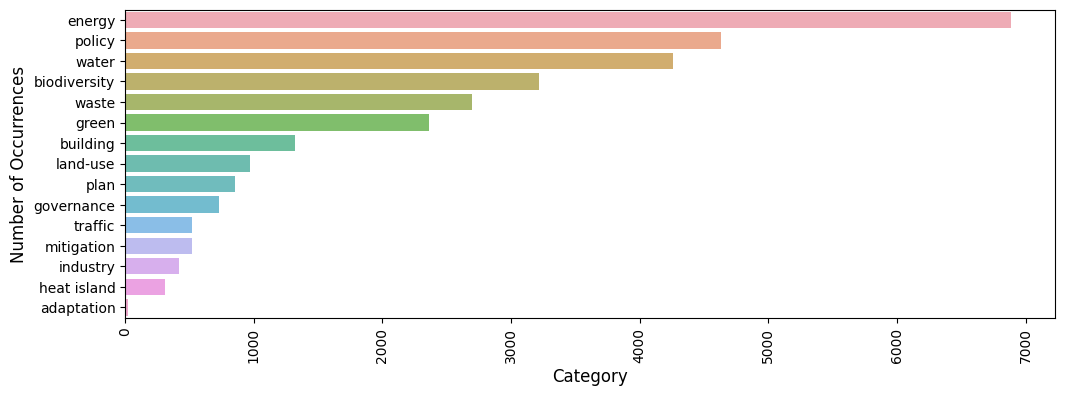

In [13]:
cnt = train_dataset['category'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x = cnt.values, y = cnt.index, alpha = 0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [14]:
dataset = train_dataset[['Abstract', 'category', 'toxic']]
dataset

,Abstract,category,toxic
1,Multiple visions for how urbanism can respond ...,policy,31
6,Climate change is the biggest global threat of...,energy,11
11,Global warming is the most significant threat ...,policy,31
14,Synopsis Recent natural disasters and weather ...,biodiversity,22
27,The Vermont (VT) Global Warming Solutions Act ...,governance,3
...,...,...,...
99507,This study extends the orienteering problem wi...,traffic,14
99515,The European Union's energy strategy and envir...,energy,11
99521,The corrosion inhibition of mild steel in 0.5 ...,industry,12
99529,Decarbonizing electricity production in the EU...,policy,31


In [15]:
class CustomTokenizer2:
    def __call__(self, text):

        if text.istitle() == True:
            text = text.capitalize()
        elif text.isupper() == True:
            text = text.capitalize()
        elif text.islower() == True:
            text = text.capitalize()
        else:
            text
        
        pat = re.sub(r'[^A-Za-z0-9\\-]',' ', text)
        pat = re.sub(r' - ',' ',pat)
        pat = re.sub(r' -',' ',pat)
        pat = re.sub(r'- ',' ',pat)
        pat = pat.strip()
        pat = " ".join(pat.split())
        pat = re.sub(r'\b\sA\s\b',' ',pat); pat = re.sub(r'\b\sB\s\b',' ',pat); pat = re.sub(r'\b\sC\s\b',' ',pat); pat = re.sub(r'\b\sD\s\b',' ',pat); pat = re.sub(r'\b\sE\s\b',' ',pat); pat = re.sub(r'\b\sF\s\b',' ',pat); pat = re.sub(r'\b\sG\s\b',' ',pat); pat = re.sub(r'\b\sH\s\b',' ',pat); pat = re.sub(r'\b\sI\s\b',' ',pat); pat = re.sub(r'\b\sJ\s\b',' ',pat); pat = re.sub(r'\b\sK\s\b',' ',pat); pat = re.sub(r'\b\sL\s\b',' ',pat); pat = re.sub(r'\b\sM\s\b',' ',pat); pat = re.sub(r'\b\sN\s\b',' ',pat); pat = re.sub(r'\b\sO\s\b',' ',pat); pat = re.sub(r'\b\sP\s\b',' ',pat); pat = re.sub(r'\b\sQ\s\b',' ',pat); pat = re.sub(r'\b\sR\s\b',' ',pat); pat = re.sub(r'\b\sS\s\b',' ',pat); pat = re.sub(r'\b\sT\s\b',' ',pat); pat = re.sub(r'\b\sU\s\b',' ',pat); pat = re.sub(r'\b\sV\s\b',' ',pat); pat = re.sub(r'\b\sW\s\b',' ',pat); pat = re.sub(r'\b\sX\s\b',' ',pat); pat = re.sub(r'\b\sY\s\b',' ',pat); pat = re.sub(r'\b\sZ\s\b',' ',pat)
        pat = re.sub(r'\b\sa\s\b',' ',pat); pat = re.sub(r'\b\sb\s\b',' ',pat); pat = re.sub(r'\b\sc\s\b',' ',pat); pat = re.sub(r'\b\sd\s\b',' ',pat); pat = re.sub(r'\b\se\s\b',' ',pat); pat = re.sub(r'\b\sf\s\b',' ',pat); pat = re.sub(r'\b\sg\s\b',' ',pat); pat = re.sub(r'\b\sh\s\b',' ',pat); pat = re.sub(r'\b\si\s\b',' ',pat); pat = re.sub(r'\b\sj\s\b',' ',pat); pat = re.sub(r'\b\sk\s\b',' ',pat); pat = re.sub(r'\b\sl\s\b',' ',pat); pat = re.sub(r'\b\sm\s\b',' ',pat); pat = re.sub(r'\b\sn\s\b',' ',pat); pat = re.sub(r'\b\so\s\b',' ',pat); pat = re.sub(r'\b\sp\s\b',' ',pat); pat = re.sub(r'\b\sq\s\b',' ',pat); pat = re.sub(r'\b\sr\s\b',' ',pat); pat = re.sub(r'\b\ss\s\b',' ',pat); pat = re.sub(r'\b\st\s\b',' ',pat); pat = re.sub(r'\b\su\s\b',' ',pat); pat = re.sub(r'\b\sv\s\b',' ',pat); pat = re.sub(r'\b\sw\s\b',' ',pat); pat = re.sub(r'\b\sx\s\b',' ',pat); pat = re.sub(r'\b\sy\s\b',' ',pat); pat = re.sub(r'\b\sz\s\b',' ',pat)
        pat = re.sub(r'\b\s0\b\s',' ',pat); pat = re.sub(r'\b\s1\b\s',' ',pat); pat = re.sub(r'\b\s2\b\s',' ',pat); pat = re.sub(r'\b\s3\b\s',' ',pat); pat = re.sub(r'\b\s4\b\s',' ',pat); pat = re.sub(r'\b\s5\b\s',' ',pat); pat = re.sub(r'\b\s6\b\s',' ',pat); pat = re.sub(r'\b\s7\b\s',' ',pat); pat = re.sub(r'\b\s8\b\s',' ',pat); pat = re.sub(r'\b\s9\b\s',' ',pat)

        token = word_tokenize(pat)
        token = [w for w in token if not w in stops]
        token = [getLemma(w, upos='NOUN')[0] for w in token]
        tagged = pos_tag(token) # 첫번째 결과를 사용
        #print(tagged)
        pat2 = [w[0] for w in tagged if w[1] == 'NN' or  w[1] == 'NNP' or  w[1] == 'NNS' or  w[1] == 'NNPS' or  w[1] == 'JJ' or  w[1] == 'JJR' or  w[1] == 'JJS' or w[0].isupper() == True]
        pat2 = [getLemma(w, upos='NOUN')[0] for w in pat2]

        pat3 = []
        for w in pat2:
            if w[0:len(w)-1].isupper() == True:
                pat3.append(w)
            else:
                pat3.append(w.lower())
        pat4 = []
        for w in pat3:
            if not w in stops:
                pat4.append(w)
            
        # climate change 합치기
        pat5 = []
        for i in range(len(pat4)):
            if i == len(pat4)-1 and pat4[i] == 'climate':
                continue
            if pat4[i] == 'climate' and pat4[i+1] == 'change':
                pat5.append("-".join(itemgetter(i,i+1)(pat4)))
                continue
            pat5.append(pat4[i])
        pat6 = []
        for i in range(len(pat5)):
            if pat5[i-1] == 'climate-change' and pat5[i] == 'change':
                continue
            pat6.append(pat5[i])
        
        pat7 = []
        for i in range(len(pat6)):
            if i == len(pat6)-1 and pat6[i] == 'case':
                continue
            if pat6[i] == 'case' and pat6[i+1] == 'study':
                pat7.append("-".join(itemgetter(i,i+1)(pat6)))
                continue
            pat7.append(pat6[i])
        pat8 = []
        for i in range(len(pat7)):
            if pat7[i-1] == 'case-study' and pat7[i] == 'study':
                continue
            pat8.append(pat7[i])
            
        pat9 = []
        for i in range(len(pat8)):
            if i == len(pat8)-1 and pat8[i] == 'carbon':
                continue
            if pat8[i] == 'carbon' and pat8[i+1] == 'emission':
                pat9.append("-".join(itemgetter(i,i+1)(pat8)))
                continue
            pat9.append(pat8[i])
        pat10 = []
        for i in range(len(pat9)):
            if pat9[i-1] == 'carbon-emission' and pat9[i] == 'emission':
                continue
            pat10.append(pat9[i])
            
        pat11 = []
        for i in range(len(pat10)):
            if i == len(pat10)-1 and pat10[i] == 'carbon':
                continue
            if pat10[i] == 'carbon' and pat10[i+1] == 'reduction':
                pat11.append("-".join(itemgetter(i,i+1)(pat10)))
                continue
            pat11.append(pat10[i])
        pat12 = []
        for i in range(len(pat11)):
            if pat11[i-1] == 'carbon-reduction' and pat11[i] == 'reduction':
                continue
            pat12.append(pat11[i])

        pat13 = []
        for i in range(len(pat12)):
            if i == len(pat12)-1 and pat12[i] == 'carbon':
                continue
            if pat12[i] == 'carbon' and pat12[i+1] == 'neutral':
                pat13.append("-".join(itemgetter(i,i+1)(pat12)))
                continue
            pat13.append(pat12[i])
        pat14 = []
        for i in range(len(pat13)):
            if pat13[i-1] == 'carbon-neutral' and pat13[i] == 'neutral':
                continue
            pat14.append(pat13[i])

        pat15 = []
        for i in range(len(pat14)):
            if i == len(pat14)-1 and pat14[i] == 'carbon':
                continue
            if pat14[i] == 'carbon' and pat14[i+1] == 'neutrality':
                pat15.append("-".join(itemgetter(i,i+1)(pat14)))
                continue
            pat15.append(pat14[i])
        pat16 = []
        for i in range(len(pat15)):
            if pat15[i-1] == 'carbon-neutrality' and pat15[i] == 'neutrality':
                continue
            pat16.append(pat15[i])

        pat17 = []
        for i in range(len(pat16)):
            if i == len(pat16)-1 and pat16[i] == 'sustainable':
                continue
            if pat16[i] == 'sustainable' and pat16[i+1] == 'development':
                pat17.append("-".join(itemgetter(i,i+1)(pat16)))
                continue
            pat17.append(pat16[i])
        pat18 = []
        for i in range(len(pat17)):
            if pat17[i-1] == 'sustainable-development' and pat17[i] == 'development':
                continue
            pat18.append(pat17[i])


        for i in range(len(pat18)):
            if pat18[i] == 'CC':
                pat18[i] = 'climate-change'

        for i in range(len(pat18)):
            if pat18[i] == 'GHG':
                pat18[i] = 'greenhous-gas'

        for i in range(len(pat18)):
            if pat18[i] == 'CO':
                pat18[i] = 'CO2'

        pat18 = [w for w in pat18 if not len(w) == 1]

        return ' '.join(pat18)

In [32]:
# dataset['token'] = 0
dataset_cp = dataset.copy()

custom_tokenizer2 = CustomTokenizer2()
for i in tqdm(dataset_cp['Abstract']):
    dataset_cp['token'].loc[dataset_cp['Abstract']==i] = custom_tokenizer2(i)

  0%|          | 0/29712 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9164\3446561915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cp['token'].loc[dataset_cp['Abstract']==i] = custom_tokenizer2(i)
100%|██████████| 29712/29712 [11:10<00:00, 44.29it/s]
